Remove stop words
---


In [130]:
import nltk

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_custom_arabic_stopwords(text):
    # Liste des stopwords en arabe
    arabic_stopwords = set(stopwords.words('arabic'))
    # Mots à exclure
    custom_stopwords = ['أقبل', 'إيه', 'بؤسا', 'بئس', 'لست', 'لستم', 'لستما', 'لستن', 'لسن', 'لسنا',
                        'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 'نعم', 'لا', 'أجل']

    # Suppression des mots spécifiques des stopwords
    arabic_stopwords = arabic_stopwords - set(custom_stopwords)
    
    custom_stopwords_to_add = ['اين','عد', 'بعد', 'لأن', 'مع', 'او', 'مني', 'بين', 'لي', 'لاكن',
                                'بل', 'كل', 'ما', 'فينهو', 'الكل', 'لو', 'باش', 'بان', 'ودوك', 'حتى',
                                'او', 'راه', 'وا',  'فهو', 'لي', 'أما', 'عنه', 'يا', 'اننا',
                                'لينا', 'ثم', 'مشي', 'مش','الشئ', 'الى','انا','الى','الل','ان','وان','وان','الان']

    # Ajout des mots spécifiques à l'ensemble des stopwords
    arabic_stopwords.update(custom_stopwords_to_add)
    
    # Tokenisation
    words = word_tokenize(text)

    # Suppression des stopwords
    filtered_words = [word for word in words if word.lower() not in arabic_stopwords]

    # Reconstitution du texte
    filtered_text = ' '.join(filtered_words)

    return filtered_text

Clean data
---

In [131]:
#supprimer les mots d'un seul caractere
def remove_single_char_words(text):
    # Utilise une expression régulière pour supprimer les mots d'un seul caractère
    pattern = re.compile(r'\b\w\b', re.UNICODE)
    
    # Remplace les occurrences par une chaîne vide
    cleaned_text = pattern.sub('', text)
    
    return cleaned_text
#remove hhhhh
def remove_ha_sequences(text):
    # Utilise une expression régulière pour trouver toutes les séquences de la lettre "ه"
    pattern = re.compile(r'(هه)+', re.UNICODE)
    # Remplace toutes les occurrences par une chaîne vide
    cleaned_text = pattern.sub('', text)
    
    return cleaned_text
#remove les article definit
def remove_definite_article(word):
    # Function to remove Arabic definite article "ال"
    word = re.sub('^ال', '', word)
    word = re.sub('^وال', '', word)
    word = re.sub('^لل', '', word)
    word = re.sub('^بال', '', word)
    return word

In [132]:
import re
import string
import numpy as np
def wordopt(text):
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub('[^a-zA-Z0-9\s\u0600-\u06FF]', ' ', text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('<.*?>+', '', text)
    
    arabic_punctuation = 'ء،؛؟«»'
    text = re.sub('[%s%s]' % (re.escape(string.punctuation), re.escape(arabic_punctuation)), ' ', text)
    
    text = re.sub('\n', '', text)
    
    text = re.sub('أ', 'ا', text)
    
    text = re.sub('\w*\d\w*', '', text)
    
    text = re.sub(r'\s+', ' ', text)
    
    text = remove_ha_sequences(text)
    
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    text = remove_single_char_words(text)
    
    text = ' '.join([remove_definite_article(word) if len(word) > 4 else word for word in text.split()])
    
    text = remove_custom_arabic_stopwords(text)
    
    return text

In [133]:
# Exemple d'utilisation
texte_exemple = """
                  ? لي نفس الشئ في مدينة برشيد مراكز التلقيح مغلقة تتبع
                   إلى غاية الاثنين اين المحاسبة،التلفزة \nمجرد صورة منمقة ؟
                    لواقع مغاي_وبئيس
                    #التنسيقية_الوطنية_للمغاربة_الرافضين_للتلقيح_الإجباري_ستنزل_للشارع

                    """
resultat = wordopt(texte_exemple)
print(resultat)

مدينة برشيد مراكز تلقيح مغلقة تتبع غاية محاسبة تلفزة مجرد صورة منمقة لواقع مغاي وبئيس تنسيقية وطنية مغاربة رافضين تلقيح إجباري ستنزل شارع


Getting data
---

In [134]:
import gensim
import pandas as pd
from gensim.utils import simple_preprocess

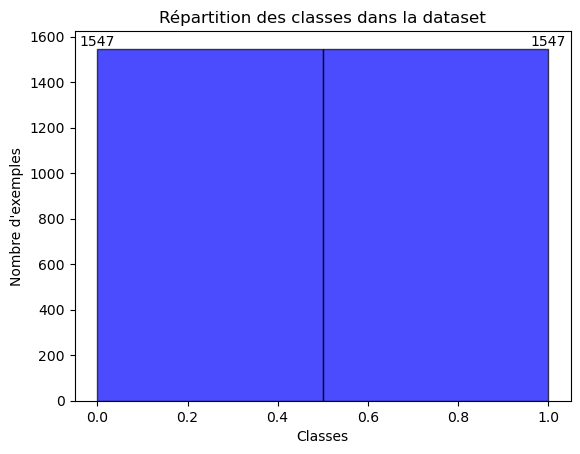

In [135]:
data = pd.read_csv("train.csv",encoding='utf-8')

import matplotlib.pyplot as plt
classes = data['label']
# Créer un histogramme
plt.hist(classes, bins=len(set(classes)), alpha=0.7, color='blue', edgecolor='black')

# Ajouter le nombre d'exemples au-dessus de chaque barre
for i in range(len(set(classes))):
    count = list(classes).count(i)  # Compter le nombre d'exemples dans chaque classe
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

# Ajouter des étiquettes
plt.title('Répartition des classes dans la dataset')
plt.xlabel('Classes')
plt.ylabel('Nombre d\'exemples')

# Afficher le diagramme
plt.show()

preprocessing and tokenisation
---

In [136]:
x_data = data.comment.apply(lambda x: wordopt(str(x)))
x_data = x_data.apply(lambda x: simple_preprocess(str(x)))

In [137]:
y_data = data['label']
# Créer un DataFrame avec x_data et y_data
df = pd.DataFrame({'x_data': x_data, 'y_data': y_data})

# Ajouter une colonne indiquant si le vecteur est vide
df['is_empty'] = df['x_data'].apply(lambda x: len(x) == 0)

# Supprimer les lignes avec des vecteurs vides
df = df[df['is_empty'] == False]

# Récupérer les séries x_data et y_data après la suppression des vecteurs vides
x_data = df['x_data']
y_data = df['y_data']
x_data #il y a un probleme de suppresssion de 'h'
for item in x_data:
    if len(item)==0:
        print(item)
print(len(y_data))

3094


Train the model
---

In [138]:
#Getting word2vec
from gensim.models import Word2Vec
model_w2v = Word2Vec.load("./Lastword2vecModel_2.model") 

model_w2v.wv.most_similar("لقاح")

[('تلقيح', 0.7421254515647888),
 ('لقاحات', 0.5640878677368164),
 ('ملقحين', 0.5349369645118713),
 ('ملقح', 0.46464911103248596),
 ('قاح', 0.46200433373451233),
 ('فيروس', 0.4380027949810028),
 ('كورونا', 0.43175357580184937),
 ('جرعة', 0.42845091223716736),
 ('مناعة', 0.40454229712486267),
 ('جرعات', 0.4022302031517029)]

In [139]:
def get_word2vec_embeddings(comment, model):
    embeddings=[]
    for word in comment:
        if word in model.wv:
            em=model.wv[word]
#             print(word,em)
        else:
            em=np.zeros(300)
#             print(word,em)
        embeddings.append(em)
    return np.sum(embeddings,axis=0)
#     return embeddings    

In [140]:
T_data= x_data.apply(lambda comment: get_word2vec_embeddings(comment, model_w2v))
print(T_data)

0       [16.53477770090103, 13.487868137657642, -0.547...
1       [-8.056338280439377, 13.608345728367567, 1.975...
2       [-4.506016820669174, 43.45208401978016, -19.30...
3       [-2.174154222011566, 13.793845146894455, 6.877...
4       [-5.483494997024536, 1.20280222594738, -5.3951...
                              ...                        
3089    [-12.809269, 7.080321, -10.201522, -6.6497126,...
3090    [0.30300254, 5.9114304, -7.486432, 10.06311, 1...
3091    [-10.24409, -0.4557264, 2.9367707, 16.17726, 2...
3092    [-6.0549726, 6.4599147, -0.9326904, -4.3398952...
3093    [-2.363607, 12.785826, 0.9136274, 4.6734557, -...
Name: x_data, Length: 3094, dtype: object


In [141]:
len(T_data[0]) #taille du vecteur caracerestique

300

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# # Convertir votre ensemble de données en un tableau NumPy
# data_list = T_data.tolist()
# data_array = np.array([np.vstack(embeddings) for embeddings in data_list])

# # Aplatir le tableau pour l'ajuster à StandardScaler
# flattened_data = data_array.reshape((data_array.shape[0], -1))

# # Initialisez le StandardScaler
# scaler = StandardScaler()

# # Calculez la moyenne et l'écart-type de l'ensemble complet
# scaler.fit(flattened_data)

# # Normalisez l'ensemble des données
# normalized_data = scaler.transform(flattened_data)

# # Diviser les données normalisées en ensembles d'entraînement et de test
# x_train, x_test, y_train, y_test = train_test_split(normalized_data, y_data, test_size=0.2)

#standarisation seulement
data_list = T_data.tolist()
data_array = np.array([np.vstack(embeddings) for embeddings in data_list])

# Aplatir le tableau pour l'ajuster à StandardScaler
flattened_data = data_array.reshape((data_array.shape[0], -1))

# Initialisez le StandardScaler
scaler = StandardScaler()

# Standardisez l'ensemble des données (remplacez la normalisation par la standardisation)
standardized_data = scaler.fit_transform(flattened_data)

# Diviser les données standardisées en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, y_data, test_size=0.1)


using softmax

In [146]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Nombre de classes 
num_classes = 2

# Définir le modèle ANN avec softmax
model = models.Sequential()
model.add(layers.Dense(512, input_dim=300, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))  # Utiliser softmax pour la classification multi-classes
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00026)
# Compiler le modèle avec la perte catégorielle croisée et l'optimiseur Adam
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Convertir les labels en one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Entraîner le modèle
model.fit(x_train, y_train_one_hot, epochs=10, batch_size=8, validation_data=(x_test, y_test_one_hot))

# Évaluer la précision sur l'ensemble de test
accuracy = model.evaluate(x_test, y_test_one_hot)[1]
print(f'Accuracy on test set: {accuracy}')

Epoch 1/10
348/348 [==============================] - 4s 8ms/step - loss: 0.8154 - accuracy: 0.5043 - val_loss: 0.6599 - val_accuracy: 0.6355
Epoch 2/10
348/348 [==============================] - 2s 7ms/step - loss: 0.7118 - accuracy: 0.5539 - val_loss: 0.6476 - val_accuracy: 0.6484
Epoch 3/10
348/348 [==============================] - 2s 7ms/step - loss: 0.6684 - accuracy: 0.5833 - val_loss: 0.6026 - val_accuracy: 0.6968
Epoch 4/10
348/348 [==============================] - 3s 7ms/step - loss: 0.6235 - accuracy: 0.6537 - val_loss: 0.5318 - val_accuracy: 0.7871
Epoch 5/10
348/348 [==============================] - 2s 7ms/step - loss: 0.5776 - accuracy: 0.7112 - val_loss: 0.4844 - val_accuracy: 0.7968
Epoch 6/10
348/348 [==============================] - 3s 7ms/step - loss: 0.5268 - accuracy: 0.7493 - val_loss: 0.4492 - val_accuracy: 0.8129
Epoch 7/10
348/348 [==============================] - 3s 7ms/step - loss: 0.4972 - accuracy: 0.7669 - val_loss: 0.4261 - val_accuracy: 0.8290
Epoch 